In [139]:
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False  # minus 표시
plt.rc('font', family='Malgun Gothic')

In [140]:
# 6개 공공자전거 대여이력정보
df1 = pd.read_csv('./Data/공공자전거 대여이력 정보_2021.01.csv', low_memory=False, encoding='cp949')
df2 = pd.read_csv('./Data/공공자전거 대여이력 정보_2021.02.csv', low_memory=False, encoding='cp949')
df3 = pd.read_csv('./Data/공공자전거 대여이력 정보_2021.03.csv', low_memory=False, encoding='cp949')
df4 = pd.read_csv('./Data/공공자전거 대여이력 정보_2021.04.csv', low_memory=False, encoding='cp949')
df5 = pd.read_csv('./Data/공공자전거 대여이력 정보_2021.05.csv', low_memory=False, encoding='cp949')
df6 = pd.read_csv('./Data/공공자전거 대여이력 정보_2021.06.csv', low_memory=False, encoding='cp949')

In [141]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)

(806503, 11)
(1226411, 11)
(2171980, 11)
(3027531, 11)
(2935504, 11)
(3445944, 11)


In [142]:
df_cc = pd.concat([df1,df2,df3,df4,df5,df6])
df_cc.shape
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


In [143]:
# 불필요한 컬럼제거
# '자전거 번호', 대여거치대, 반납거치대
#f_cc.columns
df_cc.drop(columns=['자전거번호', '대여거치대', '반납거치대'], inplace=True)
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   object 
 5   반납대여소명    object 
 6   이용시간      float64
 7   이용거리      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 934.8+ MB


In [144]:
# 카테고리로 형변환 : '대여 대여소번호', '반납대여소번호' --> 자료형 확인
df_cc['대여 대여소번호'] = df_cc['대여 대여소번호'].astype('category')
df_cc['반납대여소번호'] = df_cc['반납대여소번호'].astype('category')
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 779.2+ MB


In [145]:
# date time으로 변환
df_cc['대여일시'] = pd.to_datetime(df_cc['대여일시'])

# error 옵션, coerece = NaT로 반환
df_cc['반납일시'] = pd.to_datetime(df_cc['반납일시'], errors='coerce')
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   category      
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
dtypes: category(2), datetime64[ns](2), float64(2), object(2)
memory usage: 779.2+ MB


In [146]:
# 결측 확인
df_cc.isnull().sum()

# 결측 제거
df_cc.dropna(inplace=True)
#df_cc.dropna(subset=['이용거리'], how='any', axis=0)
df_cc.shape
df_cc.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

# 분석: 일별 이용현황

In [147]:
# 대여날짜 컬럼을 추가
df_cc['대여날짜'] = df_cc['대여일시'].dt.date
df_cc.head(3)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13


In [148]:
# 대여날짜별 대여 건수: 집계 groupby
df_cc_count = df_cc.groupby('대여날짜').대여일시.count().to_frame()

In [149]:
# 대여날짜별 대여건수 시각화
df_cc_count.columns = ['대여건수']
df_cc_count

,대여건수
대여날짜,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819
...,...
2021-06-26,105414
2021-06-27,92486
2021-06-28,105882


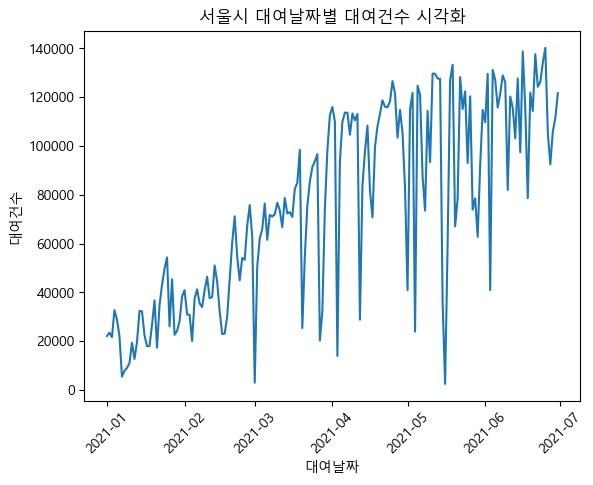

In [150]:
x = df_cc_count.index
y = df_cc_count.values
plt.plot(x,y)
plt.title('서울시 대여날짜별 대여건수 시각화')
plt.xlabel('대여날짜')
plt.ylabel('대여건수')
plt.xticks(rotation=45)
plt.show()

In [151]:
# 대여 날짜별 이용시간 
df_cc_1 = df_cc.groupby('대여날짜').이용시간.sum().to_frame()
df_cc_1

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


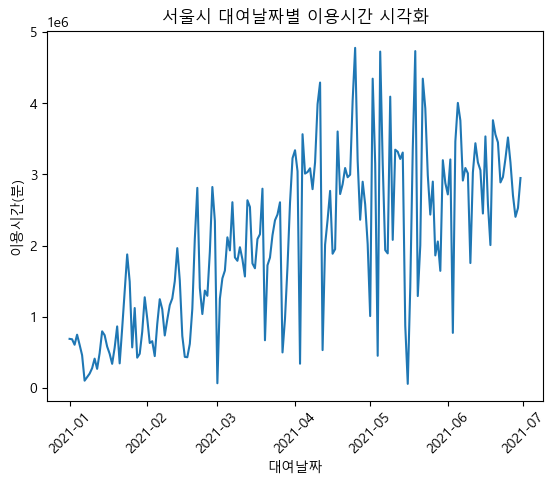

In [152]:
x = df_cc_1.index
y = df_cc_1.values
plt.plot(x,y)
plt.title('서울시 대여날짜별 이용시간 시각화')
plt.xlabel('대여날짜')
plt.ylabel('이용시간(분)')
plt.xticks(rotation=45)
plt.show()

In [153]:
# 대여 날짜별 이용 거리
df_cc_2 = df_cc.groupby('대여날짜').이용거리.sum().to_frame()
df_cc_2

,이용거리
대여날짜,
2021-01-01,4.613529e+07
2021-01-02,4.409618e+07
2021-01-03,4.059830e+07
2021-01-04,5.249645e+07
2021-01-05,6.944856e+07
...,...
2021-06-26,3.635015e+08
2021-06-27,3.078146e+08
2021-06-28,2.828124e+08


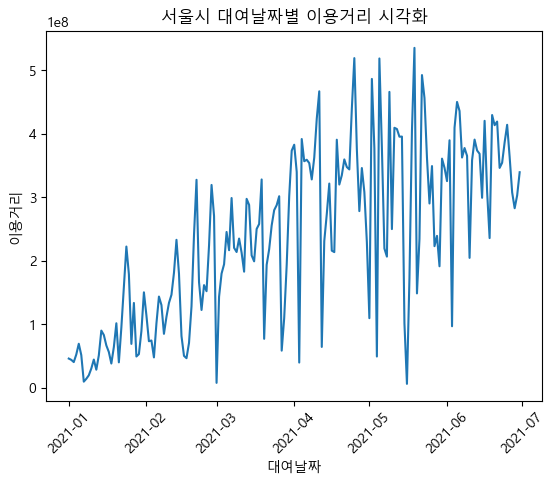

In [154]:
x = df_cc_2.index
y = df_cc_2.values
plt.plot(x,y)
plt.title('서울시 대여날짜별 이용거리 시각화')
plt.xlabel('대여날짜')
plt.ylabel('이용거리')
plt.xticks(rotation=45)
plt.show()

In [155]:
# 데이터프레임 합치기 : 이용시간 + 이용거리 + 대여건수
df_cc_con = pd.concat([df_cc_count,df_cc_1,df_cc_2], axis=1)
df_cc_con

,대여건수,이용시간,이용거리
대여날짜,,,
2021-01-01,22119,692309.0,4.613529e+07
2021-01-02,23463,686580.0,4.409618e+07
2021-01-03,21656,609571.0,4.059830e+07
2021-01-04,32732,750721.0,5.249645e+07
2021-01-05,28819,610227.0,6.944856e+07
...,...,...,...
2021-06-26,105414,3168288.0,3.635015e+08
2021-06-27,92486,2706168.0,3.078146e+08
2021-06-28,105882,2405249.0,2.828124e+08


In [156]:
# 시간대별 대여/반납 현황

# 1. 시간컬럼 만들기
df_cc['대여시간'] = df_cc['대여일시'].dt.hour
df_cc['반납시간'] = df_cc['반납일시'].dt.hour
df_cc.head(3)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21


In [157]:
# 시간대별 대여 현황
df_rental = df_cc['대여시간'].value_counts()
df_rental

18    1432779
17    1178279
19     984476
16     934211
20     825031
15     816040
8      808506
21     770378
14     725175
13     667237
22     643611
12     623065
11     537810
9      499995
7      486775
10     438084
23     341859
0      240025
6      188920
1      158905
2      103629
5       84713
3       68710
4       55391
Name: 대여시간, dtype: int64

In [158]:
# 시간대별 대여 현황
df_return = df_cc['반납시간'].value_counts()

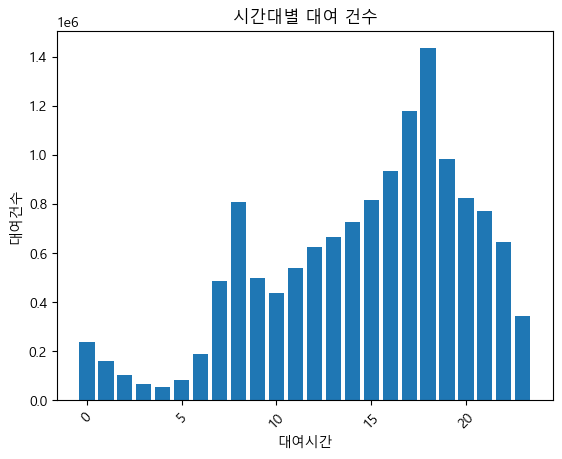

In [159]:
x = df_rental.index
y = df_rental.values
plt.bar(x,y)
plt.title('시간대별 대여 건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.xticks(rotation=45)
plt.show()

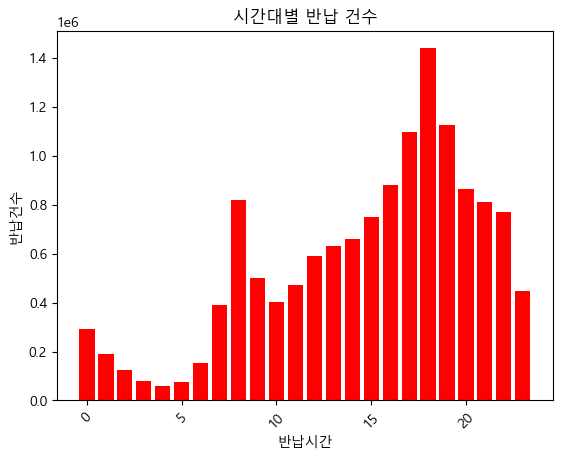

In [160]:
x = df_return.index
y = df_return.values
plt.bar(x,y,color='red')
plt.title('시간대별 반납 건수')
plt.xlabel('반납시간')
plt.ylabel('반납건수')
plt.xticks(rotation=45)
plt.show()

In [161]:
# 대여소별 대여/반납현황
df_cc

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18
...,...,...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36,2021-06-30,22,4
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71,2021-06-30,22,4
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00,2021-06-30,22,4
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4


In [162]:
# 대여소 번호의 포맷 통일
#df_cc['대여 대여소번호'] # 여기에 맞추기
df_cc['반납대여소번호'] = df_cc['반납대여소번호'].astype('str')
#df_cc.info()
# 왼쪽0 제거
df_cc['반납대여소번호'] = df_cc['반납대여소번호'].str.lstrip('0')
df_cc['반납대여소번호']


0           668
1           668
2           668
3           668
4           540
           ... 
3445939     126
3445940     437
3445941     437
3445942    2526
3445943    2526
Name: 반납대여소번호, Length: 13613604, dtype: object

In [163]:
# int 형으로
df_cc['반납대여소번호'] = df_cc['반납대여소번호'].astype('int')

# 카테고리 형으로
df_cc['반납대여소번호'] = df_cc['반납대여소번호'].astype('category')
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613604 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   category      
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
 8   대여날짜      object        
 9   대여시간      int64         
 10  반납시간      int64         
dtypes: category(2), datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 1.1+ GB


In [164]:
# 대여건수가 가장 많은 대여소 top10
# value_counts
#df_cc
df_cc[['대여 대여소번호','대여 대여소명']].value_counts()[:10].to_frame()

,,0
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,68994
502,뚝섬유원지역 1번출구 앞,68588
152,마포구민체육센터 앞,43535
2102,봉림교 교통섬,43368
1210,롯데월드타워(잠실역2번출구 쪽),37149
2715,마곡나루역 2번 출구,36988
2177,신대방역 2번 출구,31971
272,당산육갑문,31527
210,IFC몰,31443


In [165]:
df_cc[['반납대여소번호','반납대여소명']].value_counts()[:10].to_frame()

,,0
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,78958
207,여의나루역 1번출구 앞,68966
152,마포구민체육센터 앞,50607
2102,봉림교 교통섬,44572
1210,롯데월드타워(잠실역2번출구 쪽),37344
2715,마곡나루역 2번 출구,36876
272,당산육갑문,34276
210,IFC몰,33758
2177,신대방역 2번 출구,33159


In [166]:
# 여의나루역 1번출구앞 대여소 이용현황
df_207 = df_cc[df_cc['대여 대여소번호']==207]
df_207.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68995 entries, 45838 to 3445487
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   대여일시      68995 non-null  datetime64[ns]
 1   대여 대여소번호  68995 non-null  category      
 2   대여 대여소명   68995 non-null  object        
 3   반납일시      68995 non-null  datetime64[ns]
 4   반납대여소번호   68995 non-null  category      
 5   반납대여소명    68995 non-null  object        
 6   이용시간      68995 non-null  float64       
 7   이용거리      68995 non-null  float64       
 8   대여날짜      68995 non-null  object        
 9   대여시간      68995 non-null  int64         
 10  반납시간      68995 non-null  int64         
dtypes: category(2), datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 5.7+ MB


In [167]:
df_207[['반납대여소번호','반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
...,...,...
2414,도곡역 아카데미스위트 앞,1
669,청계한신휴플러스앞 삼거리,1
1661,당현천근린공원,1


In [168]:
#df_207['45838']

In [169]:
# 요일별 대여현황
df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_944\3764650754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')


In [170]:
df_207['대여요일'].value_counts()

Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8037
Tue     7235
Name: 대여요일, dtype: int64

In [175]:
df_207.describe()

,이용시간,이용거리,대여시간,반납시간
count,68995.000000,68995.000000,68995.000000,68995.000000
mean,50.285513,5782.204690,15.734546,15.850772
std,35.500149,4975.292918,5.330481,5.950141
min,1.000000,0.000000,0.000000,0.000000
25%,23.000000,2047.810000,14.000000,14.000000
50%,47.000000,4709.190000,17.000000,18.000000
75%,68.000000,8307.620000,19.000000,20.000000
max,1268.000000,79070.000000,23.000000,23.000000


In [179]:
# df_207 기본통계 이용시간(평균, 최대, 최소값)
# 전체데이터의 평균
df_207_1 = df_207.describe()['이용시간'][['mean','min','max']]
df_cc_1 = df_cc.describe()['이용시간'][['mean','min','max']]
print(df_207_1)
print(df_cc)

mean      50.285513
min        1.000000
max     1268.000000
Name: 이용시간, dtype: float64
                       대여일시 대여 대여소번호      대여 대여소명                반납일시 반납대여소번호  \
0       2021-01-02 20:50:36        3         중랑센터 2021-01-02 21:15:41     668   
1       2021-01-04 16:02:12        3         중랑센터 2021-01-04 16:17:06     668   
2       2021-01-13 21:02:05        3         중랑센터 2021-01-13 21:14:04     668   
3       2021-01-14 21:02:55        3         중랑센터 2021-01-14 21:13:41     668   
4       2021-01-18 18:02:08        3         중랑센터 2021-01-18 18:15:22     540   
...                     ...      ...          ...                 ...     ...   
3445939 2021-06-30 22:44:14      152   마포구민체육센터 앞 2021-07-01 04:48:33     126   
3445940 2021-06-30 22:45:19      152   마포구민체육센터 앞 2021-07-01 04:52:25     437   
3445941 2021-06-30 22:43:43      152   마포구민체육센터 앞 2021-07-01 04:52:27     437   
3445942 2021-06-30 22:11:14     2220  반포본동 주민센터 앞 2021-07-01 04:55:29    2526   
3445943 2021-06-30 22: